In [141]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

In [142]:
# split data into 8 different arrays
Diving_10m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Diving_10m')
Archery = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Archery')
Fencing_Epee = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Fencing_Epee')
Modern_Pentathlon = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Modern_Pentathlon')
Pole_Vault = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Pole_Vault')
Swimming_100m_Freestyle = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Swimming_100m_Freestyle')
Cycling_Road = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Cycling_Road')
Athletes_100m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Athletes_100m')

In [143]:
def plot_means(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width, color="blue")
    plt.xticks(x, labels)

In [144]:
def plot_median(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width, color="red")
    plt.xticks(x, labels)

In [145]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    
    # create subgroups of male and female atheletes
    men = sportart.loc[sportart['Gender'] == 'Men']
    women = sportart.loc[sportart['Gender'] == 'Women']
    
    print(kategorie)

    y_mean = [women['Wiki_Count'].mean(), men['Wiki_Count'].mean()]
    y_median = [women['Wiki_Count'].median(), men['Wiki_Count'].median()]
    mean_women = y_mean[0]
    mean_men = y_mean[1]
    
    print('%d women, mean: %f, median: %f' % (len(women), mean_women, y_median[0]) )
    print('%d men, mean: %f, median: %f' % (len(men), mean_men, y_median[1]) )  
    
    plt.subplot(1, 2, 1)
    plot_means([mean_women, mean_men])
    plt.subplot(1, 2, 2)
    plot_median([y_median[0], y_median[1]])

    plt.show()
    
    
    
    # conduct t test
    
    return stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])

words
80 women, mean: 334.900000, median: 124.500000
84 men, mean: 563.940476, median: 159.500000


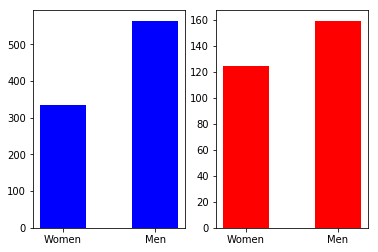

Ttest_indResult(statistic=1.4554879771696898, pvalue=0.14746931957531356)


In [146]:
# words,edits,links
print(ttest(Athletes_100m,'words')) 

In [147]:
# Put all data in one dataframe
alldata = pd.DataFrame(Diving_10m).append(Archery).append(Fencing_Epee).append(Modern_Pentathlon).append(Pole_Vault).append(Swimming_100m_Freestyle).append(Cycling_Road).append(Athletes_100m)

In [148]:
allmen = alldata.loc[alldata['Gender'] == 'Men']
allwomen = alldata.loc[alldata['Gender'] == 'Women']
withoutMen = alldata.loc[alldata['Gender'] != 'Men']
unassigned = withoutMen.loc[withoutMen['Gender'] != 'Women']

print('Women: ' + str(len(allwomen)) + ' Men: ' +str(len(allmen)) +' Unassigned: ' + str(len(unassigned)))

Women: 398 Men: 485 Unassigned: 2


In [149]:
#Extreme values on wordcount column
def extremes_per_sport(data, gender):
    disciplines = data.Discipline.unique()
    cols = ['Max', 'Min']
    max = []
    min = []
    gendered_dataFrame = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        max.append(gendered_dataFrame.loc[gendered_dataFrame['Discipline'] == discipline].Wiki_Count.max())
        min.append(gendered_dataFrame.loc[gendered_dataFrame['Discipline'] == discipline].Wiki_Count.min())
    return pd.DataFrame({'Max':np.asarray(max),
                        'Min': np.asarray(min)}, index=disciplines)

In [150]:
def plot_max(data, gender):
    labels = data.Discipline.unique()
    y_pos = np.arange(len(labels))
    performance = np.asarray(extremes_per_sport(data, gender).Max)
 
    plt.barh(y_pos, performance, align='center', alpha=0.5, color='green')
    plt.yticks(y_pos, labels)
    plt.xlabel('Wordcount')
    plt.title('Max Wordcount')
 
    plt.show()

In [151]:
extremes_per_sport(alldata, 'Men')

,Max,Min
Diving,5120,0
Archery,567,0
Fencing,5862,29
Modern Pentathlon,2987,27
Athletics,10628,24
Swimming,2305,21
Cycling Road,8282,17


In [152]:
extremes_per_sport(alldata, 'Women')

,Max,Min
Diving,1096,31
Archery,1260,18
Fencing,4179,30
Modern Pentathlon,679,26
Athletics,2619,17
Swimming,1877,28
Cycling Road,4856,26


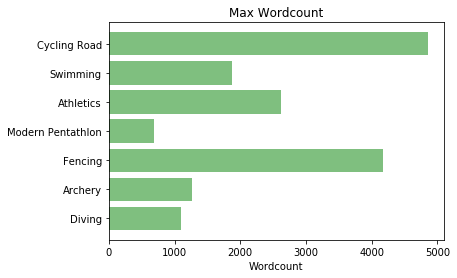

In [153]:
plot_max(alldata, 'Women')

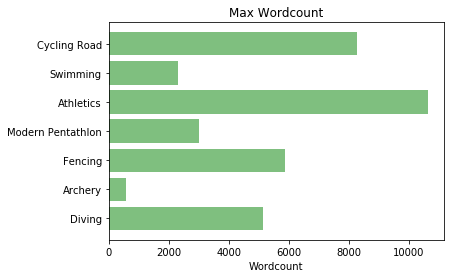

In [154]:
plot_max(alldata, 'Men')

In [155]:
def plot_min(data, gender):
    labels = data.Discipline.unique()
    y_pos = np.arange(len(labels))
    performance = np.asarray(extremes_per_sport(data, gender).Min) 
    plt.barh(y_pos, performance, align='center', alpha=0.5, color='green')
    plt.yticks(y_pos, labels)
    plt.xlabel('Wordcount')
    plt.title('Min Wordcount')
 
    plt.show()

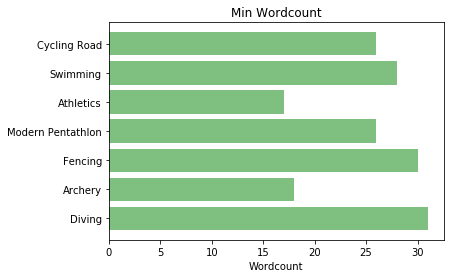

In [156]:
plot_min(alldata, 'Women')

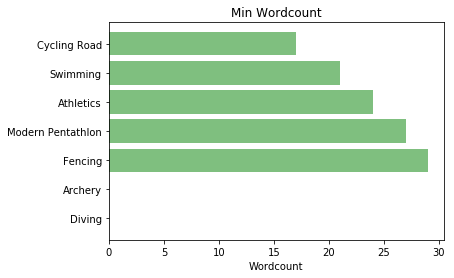

In [157]:
plot_min(alldata, 'Men')

In [158]:
# takes a pandas series (one column of a pandas dataFrame)
def histogram(data):
    num_bins = 8
    n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
    plt.show()

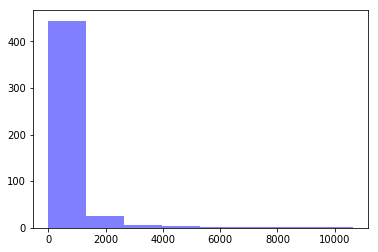

In [159]:
histogram(alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count)

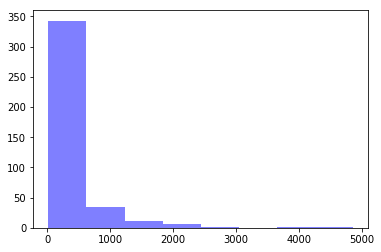

In [160]:
histogram(alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count)

In [161]:
#Number of ppl of specified gender per sport
def gender_per_sport(data):
    disciplines = data.Discipline.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'Women']
    allmen = data.loc[data['Gender'] == 'Men']
    for discipline in disciplines:
        amount_of_women = len(allwomen.loc[allwomen['Discipline'] == discipline])
        amount_of_men = len(allmen.loc[allmen['Discipline'] == discipline])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=disciplines)

In [162]:
per_sport = gender_per_sport(alldata)
#Male and female athletes per sport, where there are equal numbers of participants
# per_sport.loc[per_sport['equal'] == 'true']
per_sport

,f,m,equal
Diving,28,29,false
Archery,64,64,true
Fencing,37,38,false
Modern Pentathlon,36,36,true
Athletics,118,116,false
Swimming,48,59,false
Cycling Road,67,143,false
